In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skesn.esn import EsnForecaster

In [2]:
def plot_data(data_num, save=False):
    filename = 'C:\\Users\\njuro\\Documents\\restools\\Researches\\2022-07-26-predicting-brusselator-via-esn\\1-Dataset_from_Calum_1D_Brusselator\\brusselator1DB_%s.npz' %data_num
    data = np.load(filename)

    x = data['x']
    u = data['u']
    v = data['v']
    t = data['t']

    plt.pcolormesh(x, t, u, shading='nearest',cmap='plasma')
    plt.colorbar()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$t$')
    plt.tight_layout()
    plt.ylim([175,200])
    if save == True:
        plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_13\\u_colormesh_%s.png" %data_num)
    plt.show()

    plt.plot(u[:,2],v[:,2])
    if save == True:
        plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_13\\phase_tr_%s.png" %data_num)
    plt.show()

### визуализация всех наборов данных v(u), colormesh(u)

1


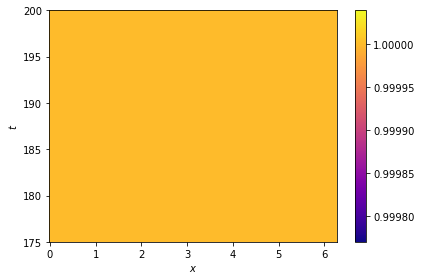

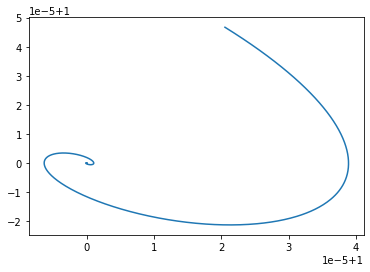

2


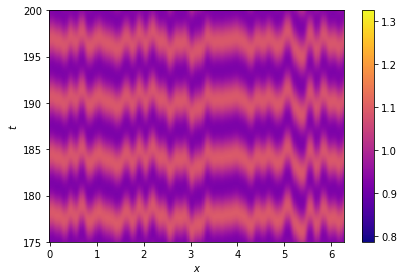

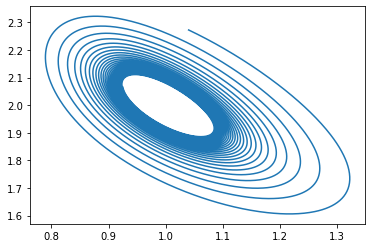

3


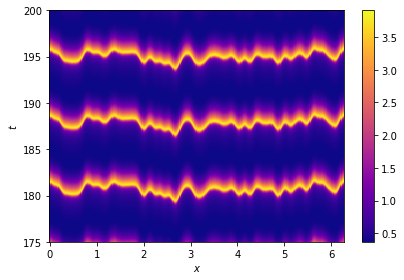

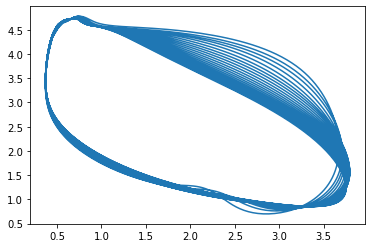

4


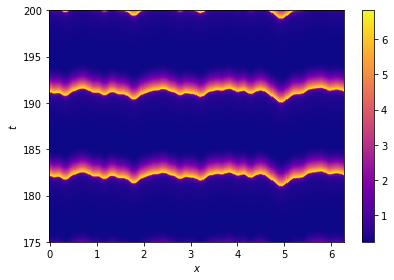

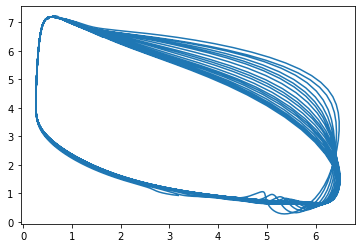

5


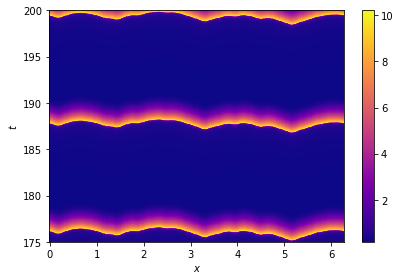

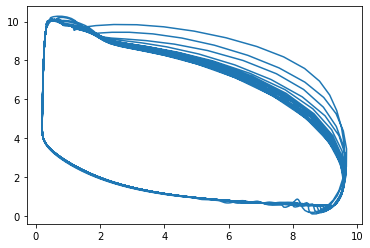

6


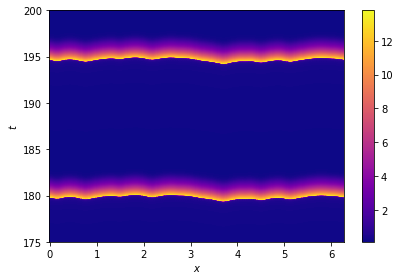

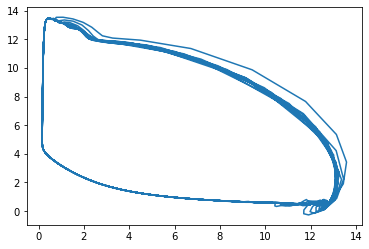

In [34]:
for i in range(1,6+1):
    print(i)
    plot_data('%i' %i, save=True)
    
    #C:\Users\njuro\Documents\Диплом Магистратура\Figures\1D_bru_images_note_08_13

### рассматриваем, из чего состоят данные 

In [21]:
filename = 'C:\\Users\\njuro\\Documents\\restools\\Researches\\2022-07-26-predicting-brusselator-via-esn\\1-Dataset_from_Calum_1D_Brusselator\\brusselator1DB_2.npz' 
data = np.load(filename)
data.files

['x', 't', 'u', 'v']

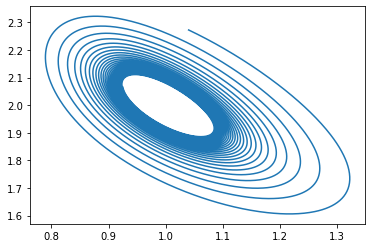

In [22]:
u = data['u']
v = data['v']

plt.plot(u[:,2],v[:,2])
plt.show()

(256,)
(18001,)


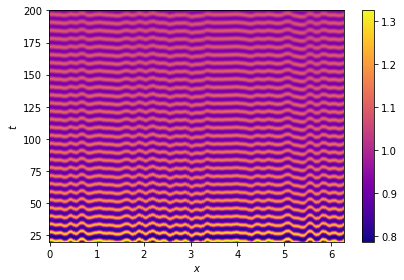

[0.         0.02454369 0.04908739 0.07363108 0.09817477 0.12271846
 0.14726216 0.17180585 0.19634954 0.22089323]


In [23]:
x = data['x']
t = data['t']
print(x.shape)
print(t.shape)

plt.pcolormesh(x, t, u, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
plt.show()

print(x[0:10])

In [24]:
print(u.shape)
print(v.shape)

(18001, 256)
(18001, 384)


In [25]:
print("x")
print(x[0], x[-1], x[11]-x[10])
print(x[:5], " ... ", x[-5:])
print("t")
print(t[0], t[-1], t[1]-t[0])
print(t[:5], " ... ", t[-5:])


x
0.0 6.258641614573416 0.02454369260617023
[0.         0.02454369 0.04908739 0.07363108 0.09817477]  ...  [6.16046684 6.18501054 6.20955423 6.23409792 6.25864161]
t
20.000000000000306 199.9999999998906 0.00999999999999801
[20.   20.01 20.02 20.03 20.04]  ...  [199.96 199.97 199.98 199.99 200.  ]


### Предсказание только одной из 256 части u и v

In [151]:
#ESN
rand=10
np.random.seed(rand)
esn_bru = EsnForecaster(n_reservoir=200,
                           spectral_radius=0.95,
                           sparsity=0,
                           regularization='noise',
                           lambda_r=0.001,
                           in_activation='tanh',
                           out_activation='identity',
                           use_additive_noise_when_forecasting=True,
                           random_state=rand,
                           use_bias=True) 
print(esn_bru)

EsnForecaster(random_state=10)


In [152]:
train_data = np.array([u[:10000,2],v[:10000,2]]).T
print(train_data.shape)

(10000, 2)


In [153]:
error = esn_bru.fit(train_data,inspect=True)

fitting...


100%|█████████████████████████████████████████████████████████████████████████▉| 9999/10000 [00:00<00:00, 34691.05it/s]

solving...


In [154]:
time_predict=10000
prediction = esn_bru.predict(time_predict,inspect=True).T 
print(prediction.shape)

predict...


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 32874.56it/s]

(2, 10000)


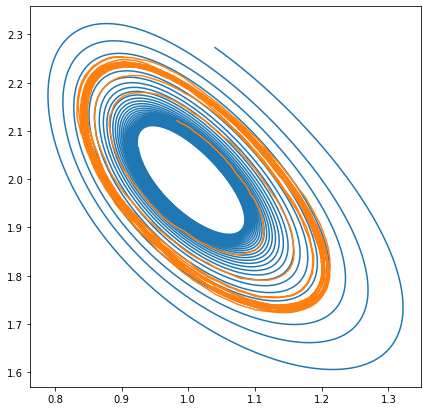

In [156]:
fig, ax = plt.subplots( figsize=(7, 7))
start = 0 ; start_p = 0
end = 18000   ; end_p = 10000#end-17500
plt.plot(u[start:end,2],v[start:end,2])
plt.plot(prediction[0, start_p:end_p], prediction[1, start_p:end_p])
plt.show()

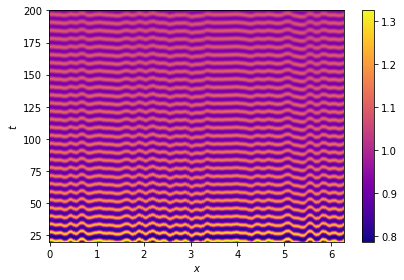

In [150]:
plt.pcolormesh(x, t, u, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
plt.show()

### end предсказание только одной из 256 части u и v

##### по этому делаем вывод о том, что v имеет ту же пространственную координату, но дискретизация на большее (в 1.5 раза) количество точек.

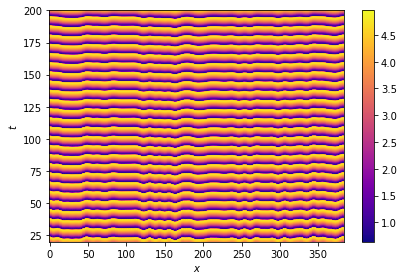

In [242]:
plt.pcolormesh(range(v.shape[1]), t, v, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
plt.show()

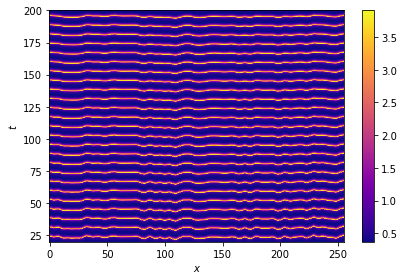

In [243]:
plt.pcolormesh(range(u.shape[1]), t, u, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
plt.show()

##### вывод закончился

### нужно перевести дискретизацию размера v в дискретизацию размера u для v

In [3]:
from thequickmath.field import Space, map_to_2d_mesh

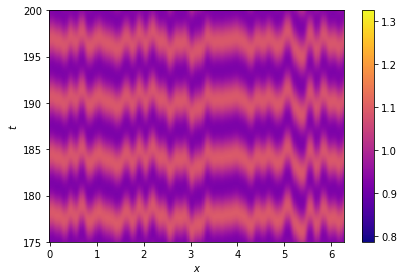

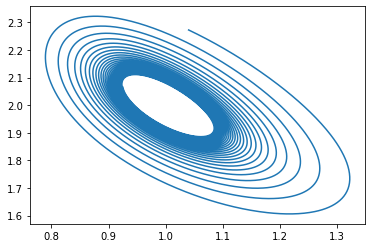

In [64]:
filename = 'C:\\Users\\njuro\\Documents\\restools\\Researches\\2022-07-26-predicting-brusselator-via-esn\\1-Dataset_from_Calum_1D_Brusselator\\brusselator1DB_2.npz' 
data = np.load(filename)
data.files
x = data['x']
t = data['t']
u = data['u']
v = data['v']
plot_data('2')

In [65]:
print(x.shape, t.shape, u.shape, v.shape)

(256,) (18001,) (18001, 256) (18001, 384)


In [66]:
x_space = Space((t,x))
print(x_space)
x_384 = np.linspace(x[0], x[-1], v.shape[1])
v_space = Space((t,x_384)) #range(v.shape[1])
print(v_space)

In [67]:
#new_field= map_to_1d_mesh(raw_field_1d, old_space, new_space)
v_new= map_to_2d_mesh(v, v_space, x_space)
print(v.shape, v_new.shape)

(18001, 384) (18001, 256)


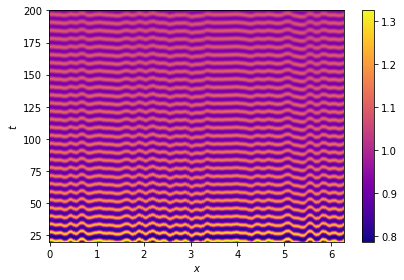

In [68]:
#проверяем:
#поле u
plt.pcolormesh(x, t, u, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
plt.show()

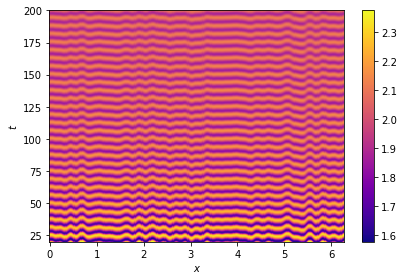

In [69]:
#поле v_new
plt.pcolormesh(x, t, v_new, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_14\\v_new_mesh.png")
plt.show()

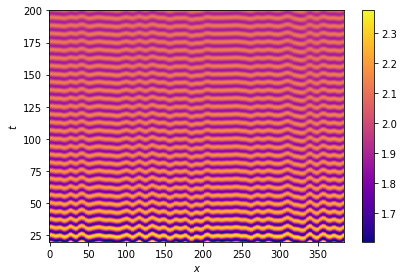

In [70]:
#поле v
plt.pcolormesh(range(v.shape[1]), t, v, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_14\\v_old_mesh.png")
plt.show()

### успешно проведена дискретизация размера v в дискретизацию размера u для v

### теперь нужно объединить u и v в один массив и подать в ESN

##### объединение проведено успешно

In [71]:
u_v_concat = np.zeros((u.shape[0], u.shape[1]+v_new.shape[1]))
print(u_v_concat.shape)
u_v_concat[:,:256] = u
u_v_concat[:,256:] = v_new
#print(u[0][0], u_v_concat[0][0])
#print(v_new[0][0], u_v_concat[0][256])

(18001, 512)


##### подаем в ESN

In [124]:
#ESN
rand=10
np.random.seed(rand)
esn_bru_uv = EsnForecaster(n_reservoir=2500,
                           spectral_radius=0.95,
                           sparsity=0,
                           regularization='noise',
                           lambda_r=0.001,
                           in_activation='tanh',
                           out_activation='identity',
                           use_additive_noise_when_forecasting=True,
                           random_state=rand,
                           use_bias=True) 
print(esn_bru_uv)

EsnForecaster(n_reservoir=2500, random_state=10)


In [125]:
time_train = 10000
train_data_uv = np.array(u_v_concat[:time_train,:])
print(train_data_uv.shape)

(10000, 512)


In [126]:
error = esn_bru_uv.fit(train_data_uv,inspect=True)

fitting...


100%|███████████████████████████████████████████████████████████████████████████▉| 9999/10000 [00:40<00:00, 248.79it/s]


solving...


In [127]:
time_predict=10000
prediction_uv = esn_bru_uv.predict(time_predict,inspect=True).T 
print(prediction_uv.shape)

predict...


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:48<00:00, 205.57it/s]


(512, 10000)


In [128]:
#разделяем предсказанное на u и v
u_pred = prediction_uv.T[:,:256]
v_pred = prediction_uv.T[:,256:]
t_pred = np.arange(20+0.01*time_train, 20+0.01*(time_train+time_predict), 0.01)
print(u_pred.shape)
print(v_pred.shape)
print(t_pred.shape)

(10000, 256)
(10000, 256)
(10000,)


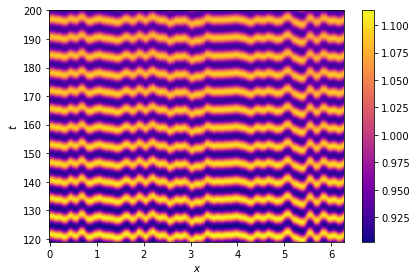

In [133]:
#проверяем:
#поле u
plt.pcolormesh(x, t[9900:], u[9900:], shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
#plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_15\\u_colormesh_2_0002.png")
plt.show()

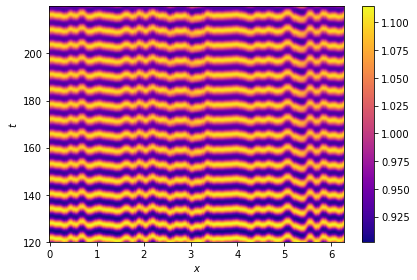

In [134]:
#предсказанное
plt.pcolormesh(x, t_pred, u_pred, shading='nearest',cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.tight_layout()
#plt.ylim([175,200])
#plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_15\\u_pred_colormesh_2_0002.png")
plt.show()

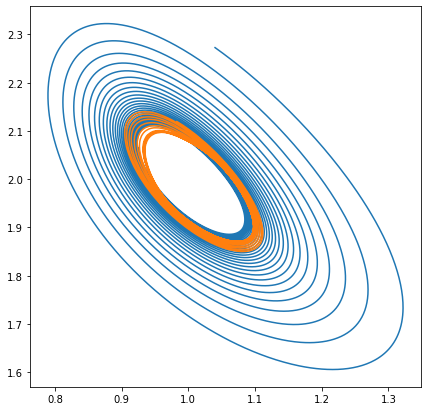

In [135]:
fig, ax = plt.subplots( figsize=(7, 7))
start =  0 # 9900 #
end = 18000 # 10100 # 
start_p = 0
end_p = 10000
plt.plot(u[start:end,2],v[start:end,2])
plt.plot(u_pred[start_p:end_p, 2], v_pred[start_p:end_p, 2])
#plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_15\\phase_tr_2_0002.png")
plt.show()

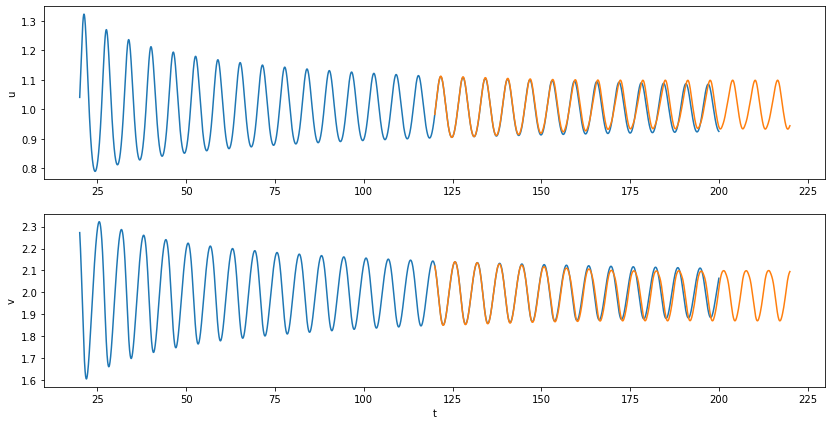

In [136]:
fig, ax = plt.subplots(2,1, figsize=(14, 7))
start = 0#  9990 # 
end =  18000# 12000  # 
start_p = 0
end_p = 10000# 120 #
ax[0].plot(t[start:end],u[start:end,2])
ax[0].plot(t_pred[start_p:end_p], u_pred[start_p:end_p, 2])
ax[0].set_ylabel("u")
ax[1].plot(t[start:end],v[start:end,2])
ax[1].plot(t_pred[start_p:end_p], v_pred[start_p:end_p, 2])
ax[1].set_ylabel("v")
plt.xlabel("t")
#plt.savefig("C:\\Users\\njuro\\Documents\\Диплом Магистратура\\Figures\\1D_bru_images_note_08_15\\u_v_ot_t_0002.png")
plt.show()

In [123]:
print(t_pred[0], t_pred[2000])

120.0 140.00000000001023
